In [6]:
# ANÁLISIS DE DATOS - (202016908A_70)
# Leonardo Neira Diaz

# Este código de Python utiliza tres librerías: pandas, numpy y matplotlib 
# para trabajar con un conjunto de datos y generar visualizaciones.

In [7]:
# El código comienza importando las librerías necesarias: pandas, numpy y matplotlib, 
# y se les asignan los alias "pd", "np" y "plt" respectivamente.
import pandas as pd 
# La librería pandas se utiliza para trabajar con estructuras de datos como DataFrames y Series.
import numpy as np 
# La librería numpy se utiliza para realizar operaciones numéricas en arreglos y matrices.
import matplotlib.pyplot as plt 
# La librería matplotlib se utiliza para generar gráficos y visualizaciones.

In [8]:
# Luego, se carga un archivo csv llamado "train.csv" utilizando la función "pd.read_csv" de la librería pandas, 
# y se almacena en un DataFrame llamado "dataset".
dataset = pd.read_csv('train.csv')

In [9]:
#Luego, se muestran las primeras tres filas del DataFrame utilizando la función "dataset.head(3)".
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
# Después, se seleccionan cuatro columnas del DataFrame ("Name", "Age", "Sex" y "Survived")
# utilizando la sintaxis de doble corchete y se muestran las primeras filas con la función "head()".
dataset[['Name', 'Age', 'Sex', 'Survived']].head()

,Name,Age,Sex,Survived
0,"Braund, Mr. Owen Harris",22.0,male,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1
2,"Heikkinen, Miss. Laina",26.0,female,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1
4,"Allen, Mr. William Henry",35.0,male,0


<AxesSubplot:xlabel='Age', ylabel='Survived'>

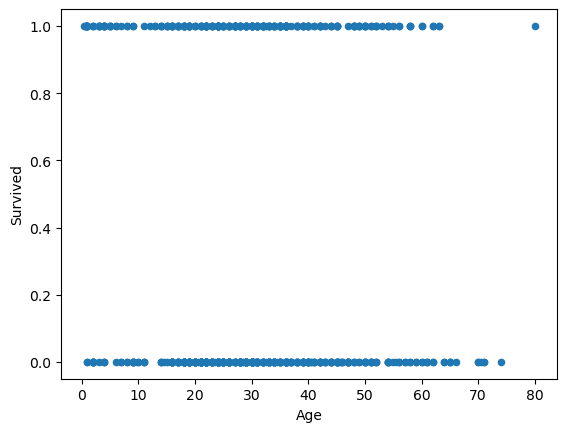

In [11]:
# A continuación, se genera un gráfico de dispersión (scatter plot) utilizando la función 
# "dataset[['Age','Survived']].plot.scatter('Age','Survived')" de pandas, con la edad en el eje X 
# y la variable objetivo "Survived" en el eje Y.
dataset[['Age','Survived']].plot.scatter('Age','Survived')

In [12]:
# Pruebas de parámetros
# Luego, se define un modelo de regresión logística con los parámetros "w" y "b"
w = 0.09
b = -3.6

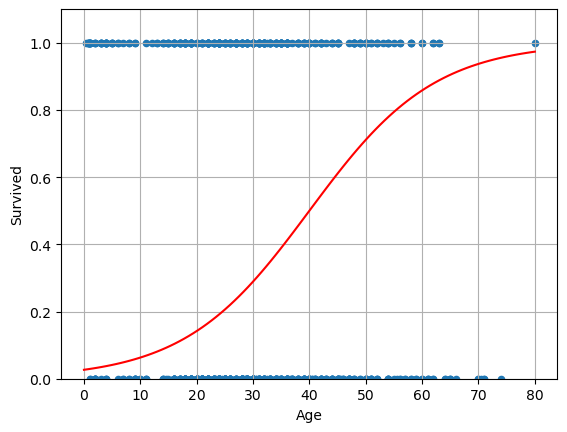

In [13]:
# puntos de la recta

# Se generan valores de la función sigmoide para un rango de valores de edad utilizando la función 
# "np.linspace". Se muestra el modelo y los puntos del gráfico anterior con la función "plt.plot" y "dataset.plot.scatter"
x = np.linspace(0,dataset['Age'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))
# grafica de la recta
dataset.plot.scatter(x='Age',y='Survived')
plt.plot(x, y, '-r')
plt.ylim(0,dataset['Survived'].max()*1.1)
plt.grid()
plt.show()

In [14]:
# Optimización de parámetros
# calculo de las predicciones

# A continuación, se calcula la función de costo "cost_j" para el modelo de regresión logística utilizando 
# los datos del DataFrame "dataset".
dataset['sigmoid'] = 1/(1+np.exp(-(dataset['Age']*w+b)))
# calculo de la funcion de error
dataset['loss_xi'] = -dataset['Survived']*np.log(dataset['sigmoid'])-(1-dataset['Survived'])*np.log(1-dataset['sigmoid'])
cost_j = dataset['loss_xi'].mean()
cost_j

0.9227175379075286

In [15]:
# Este código crea un conjunto de datos aleatorios utilizando la biblioteca NumPy y luego los convierte 
# en un objeto de DataFrame de Pandas. El conjunto de datos se compone de 100 filas y 2 columnas, donde 
# cada valor en las dos columnas es un número aleatorio generado por la función np.random.randn(). 
# El conjunto de datos tiene dos columnas con los nombres "w" y "b".
# Luego, se agrega una tercera columna "y" al DataFrame utilizando la función np.random.randint(). 
# La columna "y" contiene valores aleatorios de 0 y 1. Finalmente, se imprimen las primeras filas del 
# DataFrame utilizando la función head() de Pandas para visualizar el conjunto de datos y verificar 
# que todo se haya creado correctamente.

array = np.random.randn(100,2)

# Crear dataframe con las columnas "w" y "b"
df = pd.DataFrame(data=array, columns=['w', 'b'])

# Agregar una columna "y" con valores aleatorios 0 o 1
df['y'] = np.random.randint(0, 2, size=len(df))

# Mostrar las primeras filas del dataframe
print(df.head())

          w         b  y
0  0.876361  0.457934  0
1 -0.456153 -0.917796  1
2 -1.203220  0.024784  1
3  1.173730  0.515533  1
4  1.100167  0.049726  0


In [16]:
df

,w,b,y
0,0.876361,0.457934,0
1,-0.456153,-0.917796,1
2,-1.203220,0.024784,1
3,1.173730,0.515533,1
4,1.100167,0.049726,0
...,...,...,...
95,1.380339,-1.213496,1
96,-0.361571,1.851990,0
97,-0.552990,1.907006,1
98,-1.963197,-0.646107,0


In [17]:
# Luego, se muestra información del DataFrame con la función "dataset.info()" y estadísticas descriptivas 
# con la función "dataset.describe()".
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  sigmoid      714 non-null    float64
 13  loss_xi      714 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


In [18]:
#La función "dataset.describe()" se utiliza para obtener estadísticas descriptivas de las variables numéricas del DataFrame
# como la media, la desviación estándar, el mínimo, el máximo, entre otros.

dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sigmoid,loss_xi
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,714.000000,714.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.325479,0.922718
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.233778,0.880717
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.027593,0.026957
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.143243,0.230509
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.253506,0.607192
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.455121,1.372368
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,0.973403,3.590181


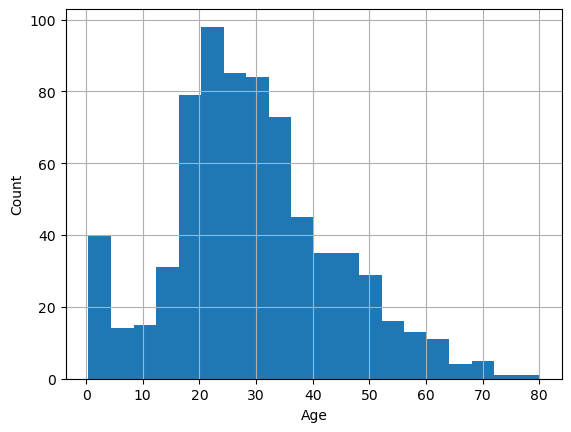

In [19]:
# Por último, se genera un histograma de la variable "Age" utilizando la función "dataset['Age'].hist(bins=20)" de pandas, 
# con 20 intervalos, y se agrega etiquetas a los ejes con las funciones "plt.xlabel" y "plt.ylabel".
# Finalmente, se muestra el gráfico utilizando la función "plt.show()".

dataset["Age"].hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

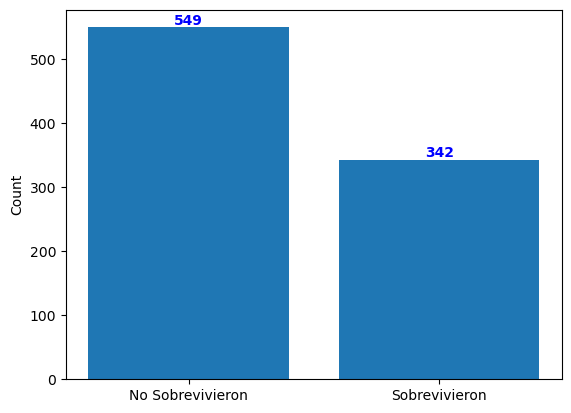

In [20]:
# Luego se genera un gráfico de barras que muestra el número de casos de sobrevivientes y no sobrevivientes
# en el conjunto de datos.

# Primero, se utiliza la función "value_counts" de pandas para contar los valores únicos de la columna 
# "Survived" del DataFrame "dataset" y se almacenan en la variable "survived_counts".

# Luego, se utiliza la función "plt.bar" de la librería matplotlib para crear un gráfico de barras, 
# donde el eje X corresponde a los índices de "survived_counts" (que son los valores únicos de "Survived", es decir, 0 y 1),
# y el eje Y corresponde al número de casos de cada valor.

# La función "plt.xticks" se utiliza para cambiar los nombres de las etiquetas del eje X a "Not Survived" y "Survived" 
# en lugar de los valores numéricos originales.

# La función "plt.ylabel" establece una etiqueta para el eje Y y la función "plt.show" muestra el gráfico.

survived_counts = dataset["Survived"].value_counts()
plt.bar(survived_counts.index, survived_counts.values)
plt.xticks([0, 1], ["No Sobrevivieron", "Sobrevivieron"])
plt.ylabel("Count")

# Agregar el valor de cada barra en el gráfico
for i, v in enumerate(survived_counts.values):
    plt.text(i, v, str(v), color='blue', fontweight='bold', ha='center', va='bottom')
    
plt.show()